# Creación de una red neuronal desde cero


Pueden consultar para generar más conjuntos de datos en: https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/  

In [ ]:
# Importamos las bibliotecas necesarias

from sklearn import datasets                  # Biblioteca que contiene un conjunto de datos sinteticos
import matplotlib.pyplot as plt               # Biblioteca para visualización grafica
import numpy as np                            # Biblioteca para el calculo algebraico 

In [ ]:
np.random.seed(0)
X, y = datasets.make_moons(2000, noise=0.10)
print('Vector de caracteristicas: \n', X)
print('Clase: \n', y)

Vector de caracteristicas: 
 [[ 0.33637739  0.89624431]
 [ 0.17656439 -0.14799358]
 [ 0.0129321   0.00735624]
 ...
 [ 1.37920295 -0.31329226]
 [-0.12543213  0.85351974]
 [-0.46925129  1.03244218]]
Clase: 
 [0 1 1 ... 1 0 0]


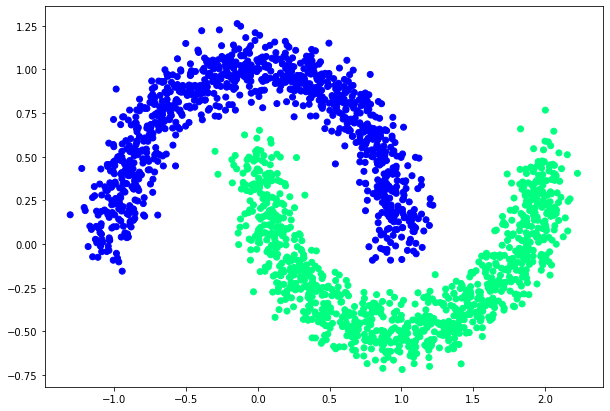

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.winter)

![picture](https://drive.google.com/uc?export=view&id=1G3quKziitbT62MPG2TAaJliS4-hE8gIA)  

## Definimos las funciones de activación. 

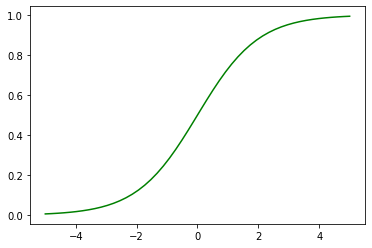

In [ ]:
# Función Sigmoide

def sigmoid(x):
    return 1/(1 + np.exp(-x))

_x = np.linspace(-5, 5)

plt.plot(_x, sigmoid(_x), c = 'green')
plt.show()

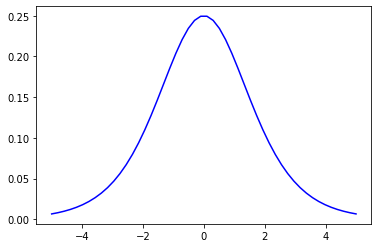

In [ ]:
# Derivada de la función sigmoide 

def dev_sig(x): 
    return sigmoid(x)*(1-sigmoid(x))

plt.plot(_x, dev_sig(_x), c = 'blue')
plt.show()

## Creación de los conjuntos de entrenamiento y prueba

In [ ]:
# Separar dentro de un conjunto de entrenamiento y prueba

from sklearn.model_selection import train_test_split                       # Biblioteca para la separación de datos en
                                                                           # conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)   # Se crea un conjunto de prueba del 20% de los datos 

y_train = y_train.reshape(1, y_train.shape[0])  # Cambiamos el y_train a una forma (1, n)
X_train = X_train.T                             # Cambiamos el X_train a una forma (2, n)

print("Total de ejemplos para entrenamiento: ", X_train.shape[1])
print("Total de ejemplos para prueba: ", X_test.shape[0])

Total de ejemplos para entrenamiento:  1600
Total de ejemplos para prueba:  400


## Establecer Hiperparámetros

In [ ]:
# Establecemos los hiperparámetros 

h1 = 10                     # Número de neuronas en la capa oculta 
lr = 0.0001                 # Taza de aprendizaje para el descenso del gradiente
epocas = 200000             # Numero de veces a iterar 

m = X_train.shape[1]        # Numero de observaciones del conjunto de entrenamiento 


# Inicialización de los pesos y sesgos 
np.random.seed(10)

w1 = 2 * np.random.rand(h1, X_train.shape[0]) -1          # Pesos de la capa oculta 
b1 = 2 * np.random.rand(h1, 1) -1                         # Sesgos de la capa oculta 

w2 = 2 * np.random.rand(y_train.shape[0], h1) -1          # Pesos de la capa de salida 
b2 = 2 * np.random.rand(y_train.shape[0], 1) -1           # Sesgo de la capa de salida 

error_cost = []                                           # Lista contenedora de los valores de la función de costo

print('W1 shape :{0:}'.format(w1.shape))
print('b1 shape :{0:}'.format(b1.shape))
print('W2 shape :{0:}'.format(w2.shape))
print('b2 shape :{0:}'.format(b2.shape))

W1 shape :(10, 2)
b1 shape :(10, 1)
W2 shape :(1, 10)
b2 shape :(1, 1)


La función de costo a utilizar es la entropía cruzada:

$$ -\frac{1}{m} * \sum_{i = 1}^{n} (y * log(\hat{y}) + ((1-y)*np.log(1-\hat{y})))  $$

Para minimizar el costo se utiliza una técnica conocida como **retropropagación** (*backpropagation*). Esta técnica consiste en encontrar la derivada de los parametros que influyen en que la función de costo disminuya, en este caso son el peso (*w*) y el sesgo (*b*). Sin embargo, estos parametros no pueden derivarse de manera directa, y para ellos se hace uso de la regla de la cadena. Entonces, derivando la función de costo con respecto a los pesos de la última capa, las derivadas parciales quedan de la siguiente manera: 

### Fórmula para el cálculo del costo y sesgo de la capa de salida 

$$ \frac{\partial{cost^{out}}}{\partial{w^{out}}} =  (a^{out} - y)a^{h} = \delta^{out} a^{h} $$ 
$$ \frac{\partial{cost^{out}}}{\partial{b^{out}}} =  (a^{out} - y) = \delta^{out} $$ 

### Fórmula para el cálculo del costo y sesgo de la capa oculta

$ \delta^{h} = \delta^{out}  w^{out} d(a^{h}) $

$$ \frac{\partial{cost^{h}}}{\partial{w^{h}}} = \delta^{h} X $$

$$ \frac{\partial{cost^{h}}}{\partial{b^{h}}} = \delta^{h} $$


### Si se quiere buscar para más capas

$$ \frac{\partial{cost^{L}}}{\partial{w^{L}}} = \frac{\partial{cost^{L}}}{\partial{a^{L}}} \frac{\partial{a^{L}}}{\partial{z^{L}}} \frac{\partial{z^{L}}}{\partial{w^{L}}} $$






In [ ]:
for epoca in range (epocas):
    
    # Propagación hacia adelante   (forward propagation)
    z1 = np.dot(w1, X_train) + b1     # (10, 2) x (2, 1600) = (10, 1600) + (10, 1) = (10, 1600) 
    a1 = sigmoid(z1)                  # = (10, 1600) 

    z2 = np.dot(w2, a1) + b2          # (1, 10) x (10, 1600) = (1, 1600) + (1) = (1, 1600)
    a2 = sigmoid(z2)                  # (1, 1600)

    # Función de costo

    if epoca % 200 == 0:
            loss = -(1/y_train.shape[1]) * np.sum(y_train * np.log(a2) +  ((1-y_train)*np.log(1-a2))) 
            print('Valor de la función de costo: ', loss)
            error_cost.append(loss)

    # Cálculo de las derivadas parciales de la capa de salida

    delta2 = a2 - y_train                                       # (1, 1600)
    dcost_w2 = np.dot(delta2, a1.T)  * (1/m)                    # (1, 1600) x (1600, 10) = (1, 10)
    dcost_b2 = np.sum(delta2, axis=1, keepdims=True) * (1/m)    # (1, 1)

    # Cálculo de las derivadas parciales de la capa oculta

    delta1 = np.dot(w2.T, delta2) * dev_sig(z1)            # (10, 1) x (1, 1600) = (10, 1600) * (10, 1600) = (10, 1600)
   
    dcost_w1 = np.dot(delta1, X_train.T)  * (1/m)          # (10, 1600) x (1600, 2) = (10, 2)
    dcost_b1 = np.sum(delta1, axis = 1, keepdims = True) * (1/m)    # (10, 1)
    
    # Actualización de los pesos y sesgos 
    w1 -= lr * dcost_w1
    b1 -= lr * dcost_b1
    w2 -= lr * dcost_w2
    b2 -= lr * dcost_b2




Valor de la función de costo:  0.5982860339090785
Valor de la función de costo:  0.5975438629897257
Valor de la función de costo:  0.5968156524476868
Valor de la función de costo:  0.5961009076394962
Valor de la función de costo:  0.5953991516515891
Valor de la función de costo:  0.5947099246988516
Valor de la función de costo:  0.5940327835407561
Valor de la función de costo:  0.5933673009147981
Valor de la función de costo:  0.5927130649869323
Valor de la función de costo:  0.592069678818694
Valor de la función de costo:  0.5914367598506745
Valor de la función de costo:  0.5908139394020222
Valor de la función de costo:  0.5902008621856192
Valor de la función de costo:  0.589597185838586
Valor de la función de costo:  0.589002580467761
Valor de la función de costo:  0.5884167282097967
Valor de la función de costo:  0.5878393228055141
Valor de la función de costo:  0.5872700691881544
Valor de la función de costo:  0.5867086830851713
Valor de la función de costo:  0.5861548906332036
Val

## Graficando la función de costo 

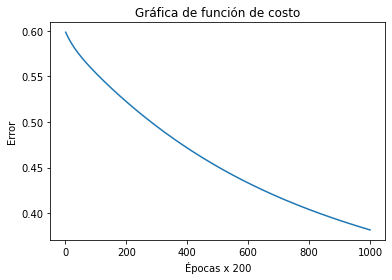

In [ ]:
len_e = len(error_cost)
_x = np.linspace(1, len_e, len_e)

plt.plot(_x, error_cost)
plt.title('Gráfica de función de costo')
plt.ylabel('Error')
plt.xlabel('Épocas x 200')
plt.show()

## Realizar predicciones

In [ ]:
X_test = X_test.T
X_test.shape

(2, 400)

In [ ]:
z1 = np.dot(w1, X_test) + b1 
a1 = sigmoid(z1)
z2 = np.dot(w2, a1) + b2
out = sigmoid(z2)
out = out.reshape(out.shape[1])

In [ ]:
y_hat = []
for i in (out): 
    if i >= 0.5:
        y_hat.append(1)
    else: 
        y_hat.append(0)

y_hat = np.array(y_hat)
y_hat = y_hat.reshape(y_hat.shape[0]) 
print(y_hat.shape)

y_test = y_test.reshape(y_test.shape[0])    # 1, y_test.shape[0]
print(y_test.shape) 

(400,)

## Metricas de evaluación

### Exactituid

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.8275

## F1 Score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat, average='binary')

0.833734939759036

## ROC AUC

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_hat)

0.8276942355889724

## Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat)

array([[158,  32],
       [ 37, 173]])

*Este notebook fue hecho por Dioney Alberto Contreras Sanchez, estudiante de la maestría en ciencias en sistemas digitales, para el taller de aprendizaje con redes neuronales profundas, teoría y práctica.* 

Correo: cdioneys@gmail.com

Github: https://github.com/DioneyC

*Está basado en: https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-adding-hidden-layers/*. 

1. Cambiar la función de activación de la capa oculta por ReLu 

2. Cambiar la función de costo pos MSE 

3. Cambiar la cantidad de neuronas en la capa oculta, la taza de aprendizaje, el número de épocas.* 